# The Sparks Foundation- Data Science & Bussiness Analytics

## Task 1- Prediction using Supervised Machine Learning

In this task is based on the prediction of the percentage of an student based on the no. of studied hours by using simple linear regression method.

#### Step 1: Importing the dataset
#### Step 2: Visualizing the dataset
#### Step 3: Data preparation
#### Step 4: Training the algrithm
#### Step 5: Visualizing the model
#### Step 6: Making prediction
#### Step 7: Evaluating the model

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [3]:
# now let's observe the dataset
s_data.head(10)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25

In [4]:
s_data.tail(10)

Hours  Scores
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [5]:
# To find the number of columns and rows
s_data.shape

(25, 2)

In [6]:
# To find more information about dataset
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
s_data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [10]:
# we can also use .corr to dteremine the corelation between the variables
s_data.corr()

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

As we can see that we don't have any null values in our dataset so we can now move towards next step

### *Step 2- Visualzing of the dataset*

Let's plot our data points on 2-D graph to eyeball our dataset & see if we can manually find any relation between the data.We can create the plot with the following script:

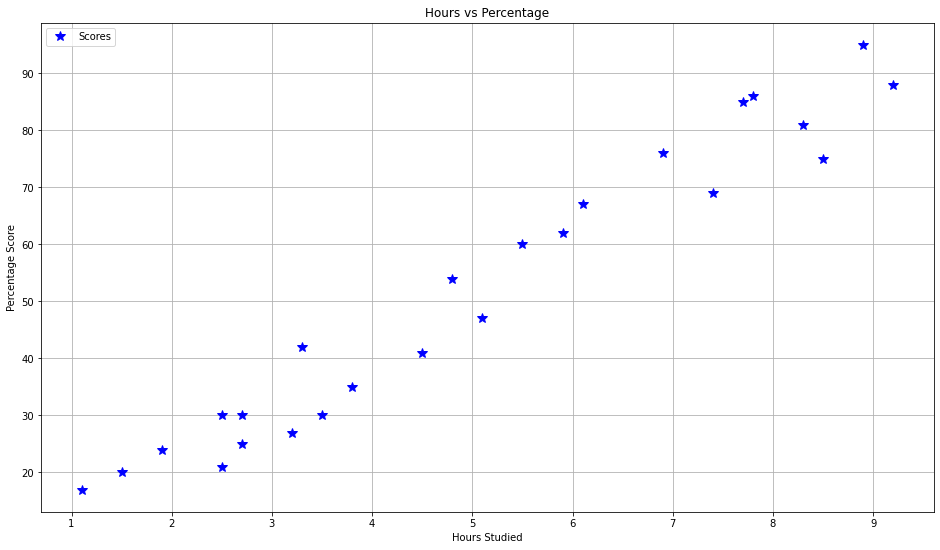

In [9]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
s_data.plot(x='Hours', y='Scores', style='*', color='blue', markersize=10)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

In [26]:
# we can also use .corr to determine the co-relation between the variables
s_data.corr()

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

### *Step 3- Preparing the data*

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
s_data.head(5)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [13]:
# using iloc function we will divide the data
X = s_data.iloc[:, :1].values  
y = s_data.iloc[:, 1].values  

In [29]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### *Step 4- Training the Algorithm*
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

### *Step 5 - Visualizing model*

After the training the model,now we can visualize it. 

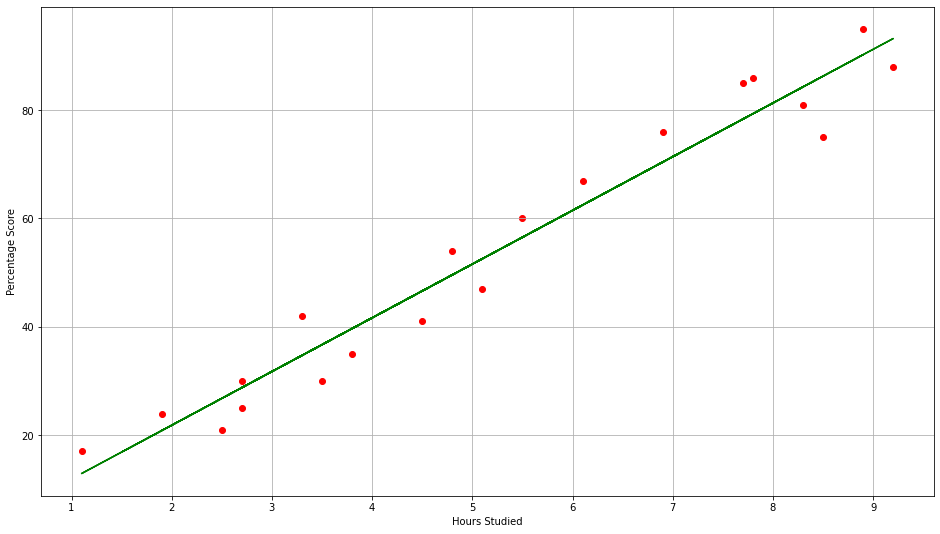

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.rcParams["figure.figsize"] = [16, 9]
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


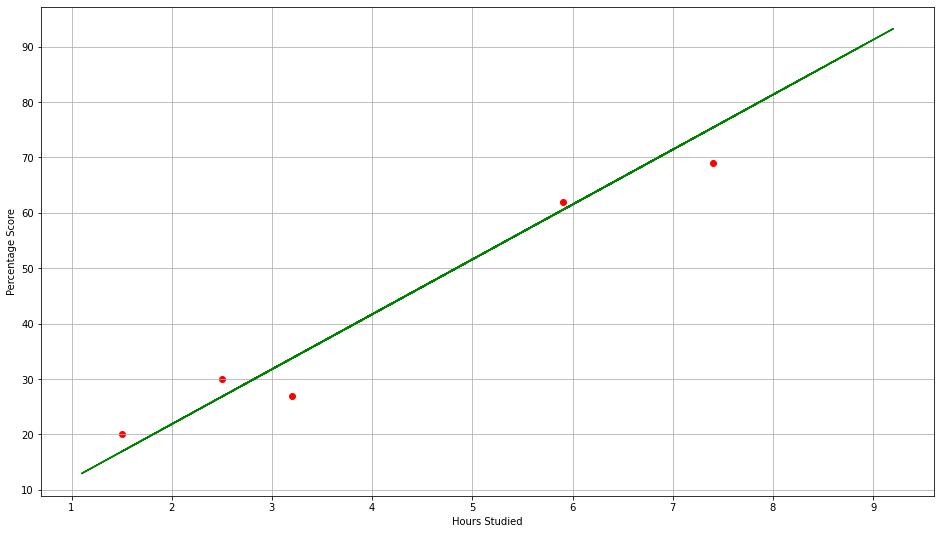

In [17]:
# Plotting for the testing data
plt.rcParams["figure.figsize"] = [16, 9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### *Step 6 - Predictions making*

now we have trained our algorithm, it's time to make some predictions

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [20]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Hence, it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173248737538

### *Step 7 - Evaluating the model*

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
